<a href="https://colab.research.google.com/github/VaishnaviMore33/Brain-Tumor-Detection/blob/main/Brain_Tumour_Detection_Vaishnavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the data from
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

#unzip the data
!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip"

--2022-04-29 10:15:12--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2022-04-29 10:15:12--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9418a4d187c80b2be50f9fe7c2.dl.dropboxusercontent.com/cd/0/inline/BkTU8Vqm3jwBIhIPEbWx7zvusEWTgj2FMIPoCvsxF39AMu-cNze_sj5F09DYqz19AHpdbMr-ta4fj9rYEJObaEyOeIIzsYqx6-2Dz64dRxkxnVbVucdNuZANwR9Ufgb3bUrcbzLwIHe2nO4aSLqQOeQ-e0YsxW5X36NeNPBWHnKexA/file# [following]
--2022-04-29 10:15:13--  https://uc9418a4d187c80b2be50f9fe7c2.dl.dropboxusercontent.com/cd/0/inline/BkTU8Vqm3jwBIhIPEbWx

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#count the number of images in respective classes 0-Brain Tunor 1-Healthy
ROOT_DIR = "/content/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthey', 2087)])

we will split the data such that

    70% for Train Data
    15% for Validation
    15% for testing


In [5]:
# we will create a train folder


if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) , 
                                size = (math.floor(70/100*number_of_images[dir])-5), 
                                replace=False):
      O = os.path.join(ROOT_DIR, dir, img) #path; not image
      D = os.path.join("./train", dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("The folder exists")

In [6]:
def dataFolder(path, split):
  # we will create a train folder


 if not os.path.exists("./"+path):
   os.mkdir("./"+path)

   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+path+"/"+dir)

     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) , 
                                size = (math.floor(split*number_of_images[dir])-5), 
                                replace=False):
       O = os.path.join(ROOT_DIR, dir, img) #path; not image
       D = os.path.join("./"+path, dir)
       shutil.copy(O,D)
       os.remove(O)
 else:
   print(f"{path} folder exists")

In [7]:
dataFolder("train", 0.7)

train folder exists


In [8]:
dataFolder("val", 0.15)

In [9]:
dataFolder("test", 0.15)

In [10]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 17), ('Healthey', 16)])

Model Build

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten , Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.applications.mobilenet import preprocess_input

In [12]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))


model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

Preparing our data using Data Generator

In [13]:
def preprocessingImages1(path):
  """
  input: Path
  output: Pre Processed Images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2,preprocessing_function= preprocess_input, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode= 'binary')

  return image

In [14]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [16]:
def preprocessingImages2(path):
  """
  input: Path
  output: Pre Processed Images
  """
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode= 'binary')

  return image

In [17]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [19]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


Model Training

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [21]:
base_model = MobileNet(input_shape = (224,224,3), include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [22]:
for layer in base_model.layers:
  layer.trainable = False

In [23]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation="sigmoid")(X)

model= Model(base_model.input, X)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [25]:
model.compile(optimizer='rmsprop', loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])


In [26]:
# Early stopping and model check point

from keras.callbacks import  ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor= "val_accuracy",min_delta= 0.01, patience= 3, verbose= 1, mode= 'auto')

# model check point

mc = ModelCheckpoint(monitor= "val_accuracy",filepath= "./bestmodel.h5", verbose=1, save_best_only= True, mode= 'auto')

cd=[mc,es]

In [35]:
hs =  model.fit_generator(generator= train_data, 
                          steps_per_epoch= 8, 
                          epochs= 30, 
                          verbose= 1, 
                          validation_data= val_data, 
                          validation_steps=16, 
                          callbacks= cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.8594
Epoch 1: val_accuracy did not improve from 0.95117
8/8 [==============================] - 29s 4s/step - loss: 1.3868 - accuracy: 0.8594 - val_loss: 1.1579 - val_accuracy: 0.8516
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.9180
Epoch 2: val_accuracy improved from 0.95117 to 0.96094, saving model to ./bestmodel.h5
8/8 [==============================] - 29s 4s/step - loss: 0.4521 - accuracy: 0.9180 - val_loss: 0.2285 - val_accuracy: 0.9609
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6216 - accuracy: 0.9102
Epoch 3: val_accuracy did not improve from 0.96094
8/8 [==============================] - 28s 4s/step - loss: 0.6216 - accuracy: 0.9102 - val_loss: 0.4393 - val_accuracy: 0.9297
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.2097 - accuracy: 0.8008
Epoch 4: val_accuracy improved from 0.96094 to 0.96289, saving

In [36]:
#load the best fit model
from keras.models import load_model

model= load_model("/content/bestmodel.h5")

In [37]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of our model is {acc*100}")

The accuracy of our model is 96.31811380386353


In [38]:
# Model Graphical Interpretation
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

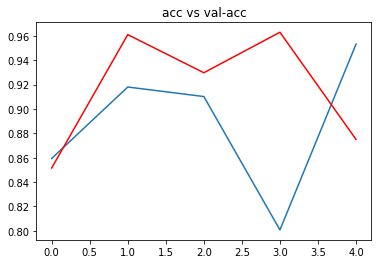

In [39]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")

plt.title("acc vs val-acc")
plt.show()

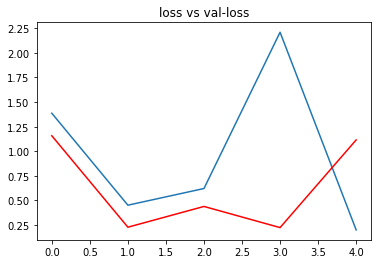

In [40]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")

plt.title("loss vs val-loss")
plt.show()

In [41]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The MRI is having a Tumor


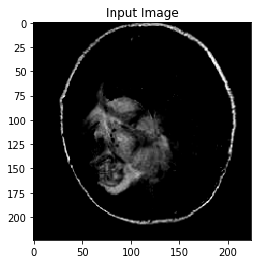

In [43]:
# path for the image to see if it predicts correct class

path = "/content/train/Brain Tumor/Cancer (1007).jpg"
img = load_img(path, target_size= (224, 224))

i = image.img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr)) 

if pred == 0:
  print("The MRI is having a Tumor")
else:
  print("The MRI is not having a Tumor")

# To display the image

plt.imshow(input_arr[0])
plt.title("Input Image") 
plt.show()